In [1]:
import pandas as pd
import numpy as np
import datetime
import pvlib
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

/home/dutchman/miniconda3.1/lib/python3.7/site-packages/pvlib/forecast.py:20: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


# 西安 Forecast

In [2]:
latitude = 34.3416
longitude = 108.9398
start = pd.Timestamp(datetime.date.today())
end = start + pd.Timedelta(days=3)

In [3]:
gfs = GFS()

In [4]:
data = gfs.get_processed_data(latitude, longitude, start, end)

/home/dutchman/miniconda3.1/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 1.0, 'GFS Forecast')

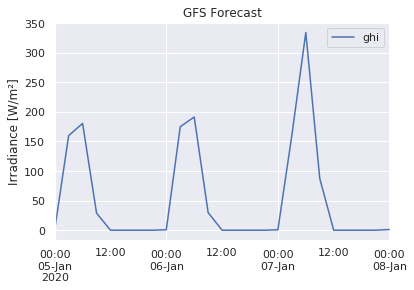

In [5]:
data.ghi.plot()
plt.ylabel("Irradiance [W/m²]")
plt.legend()
plt.title("GFS Forecast")

### Compare with clearsky

/home/dutchman/miniconda3.1/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 1.0, "Xi'an clearsky in different resolutions\n(label right)")

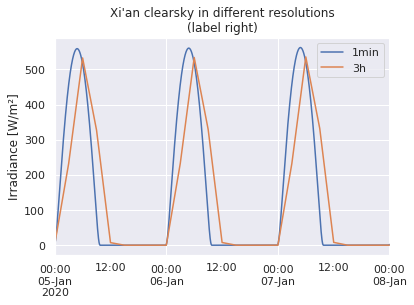

In [6]:
cs = pvlib.location.Location(latitude, longitude).get_clearsky(pd.date_range(start, end, freq="1min", tz="UTC"))
cs3h = cs.resample("3h", closed="right", label="right").mean()

cs.ghi.plot(label="1min")
cs3h.ghi.plot(label="3h")

plt.ylabel("Irradiance [W/m²]")
plt.legend()
plt.title("Xi'an clearsky in different resolutions\n(label right)")

/home/dutchman/miniconda3.1/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


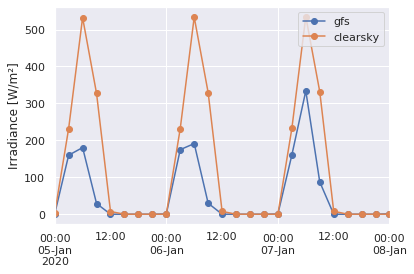

In [7]:
data.ghi.plot(label="gfs",style="o-")
cs3h.ghi.plot(label="clearsky", style="o-")

plt.ylabel("Irradiance [W/m²]")
plt.legend()

### Resample

In [8]:
resample1 = data.ghi.resample("5min").interpolate()
resample2 = gfs.cloud_cover_to_irradiance(data['total_clouds'].resample("5min").interpolate(), how='clearsky_scaling').ghi

/home/dutchman/miniconda3.1/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0, 0.5, 'Irradiance [W/m²]')

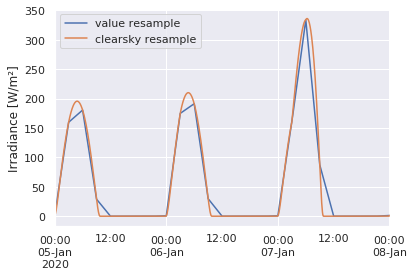

In [9]:
resample1.plot(label="value resample")
resample2.plot(label="clearsky resample")

plt.legend()
plt.ylabel("Irradiance [W/m²]")

Text(0.5, 0, 'Value [W/m²]')

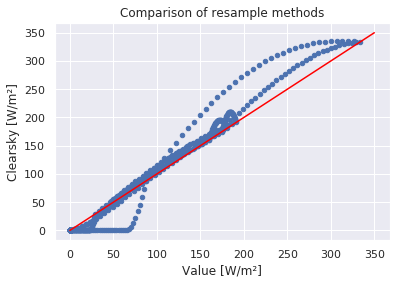

In [10]:
df = pd.DataFrame()
df["value"] = resample1
df["clearsky"] = resample2

df.plot.scatter("value", "clearsky")
plt.plot([0, 350], [0, 350], color="red")

plt.title("Comparison of resample methods")
plt.ylabel("Clearsky [W/m²]")
plt.xlabel("Value [W/m²]")